In [1]:
import os
from Bio.PDB import PDBParser
from Bio.PDB.SASA import ShrakeRupley
from Bio.SeqUtils.ProtParam import ProteinAnalysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from Bio import BiopythonWarning
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore', BiopythonWarning)

In [2]:
path = '/Users/evagsm/Work/Shuguang/kcn/'
pdb_files = [f for f in os.listdir(path) if f.endswith('pdb')]
#len(pdb_files)

In [3]:
names = set([x.split('_')[0] for x in pdb_files])
cryoem = [i for i in pdb_files if 'cryoem' in i]
native = [i for i in pdb_files if 'native' in i]
qty = [i for i in pdb_files if 'qty' in i]
#len(names), len(cryoem), len(native), len(qty)

In [4]:
def structure_to_sequence(pdb_file):
    
    d3to1 = {'CYS': 'C', 'ASP': 'D', 'SER': 'S', 'GLN': 'Q', 'LYS': 'K',
             'ILE': 'I', 'PRO': 'P', 'THR': 'T', 'PHE': 'F', 'ASN': 'N', 
             'GLY': 'G', 'HIS': 'H', 'LEU': 'L', 'ARG': 'R', 'TRP': 'W', 
             'ALA': 'A', 'VAL': 'V', 'GLU': 'E', 'TYR': 'Y', 'MET': 'M'}
    
    p = PDBParser(QUIET = True)
    structure = p.get_structure('structure', pdb_file)    
    
    sequence = []
    for model in structure:
        for chain in model:
            for residue in chain:
                sequence.append(d3to1[residue.resname])
                
    return ''.join(sequence)


def characteristics(pdb_file):
    
    data = []
    
    p = PDBParser(QUIET = True)
    sequence = structure_to_sequence(pdb_file)
    structure = p.get_structure('structure', pdb_file)
    
    #print(f'>{pdb_file.split("/")[-1][:-4]}\n{sequence}')
    
    analysis = ProteinAnalysis(sequence)
    solvent_accessibility = ShrakeRupley()
    
    stability = analysis.instability_index() # Any value above 40 means the protein is unstable
    gravy = analysis.gravy() # Negative GRAVY means the protein is non-polar, positive GRAVY means polar
    flexibility = np.mean(analysis.flexibility())
    #aromaticity = analysis.aromaticity() # Relative frequency of Phe, Trp, and Tyr
    solvent_accessibility.compute(structure, level = 'S') # Protein surface area accessible to a solvent
    sasa = structure.sasa
    
    return [stability, gravy, flexibility, sasa]

In [5]:
data = []

for name in names:
    
    #print(name)
    native_file = [i for i in native if i.startswith(name)][0]
    qty_file = [i for i in qty if i.startswith(name)][0]
    
    native_data = characteristics(path + native_file)
    qty_data = characteristics(path + qty_file)
    
    try: 
        cryoem_file = [i for i in cryoem if i.startswith(name)][0]
        cryoem_data = characteristics(path + cryoem_file)
        
    except Exception:
        cryoem_data = [None, None, None, None]
        
    native_data.extend([name, 'Native']) 
    cryoem_data.extend([name, 'Cryo-EM'])
    qty_data.extend([name, 'QTY'])
    
    data.append(native_data)
    data.append(cryoem_data)
    data.append(qty_data)    

In [6]:
columns = ['Stability', 'GRAVY', 'Flexibility', 'SASA', 'name', 'type']
df = pd.DataFrame(data, columns = columns)
#df.shape

In [7]:
# DeepSoluE predictions

DeepSoluE = [
    
['KCNA5', 'Native', 0.081, 'insoluble'], 
['KCNA5', 'QTY', 0.7395, 'soluble'], 
['KCNMA1', 'Native', 0.0959, 'insoluble'], 
['KCNMA1', 'QTY', 0.8603, 'soluble'], 
['KCNMA1', 'Cryo-EM', 0.2797, 'insoluble'], 
['KCNN4', 'Native', 0.3427, 'insoluble'], 
['KCNN4', 'QTY', 0.6956, 'soluble'], 
['KCNN4', 'Cryo-EM', 0.4313, 'insoluble'], 
['KCNJ3', 'Native', 0.212, 'insoluble'], 
['KCNJ3', 'QTY', 0.7238, 'soluble'], 
['KCNA1', 'Native', 0.0866, 'insoluble'], 
['KCNA1', 'QTY', 0.8139, 'soluble'], 
['KCNC4', 'Native', 0.1572, 'insoluble'], 
['KCNC4', 'QTY', 0.7719, 'soluble'], 
['KCNH5', 'Native', 0.1099, 'insoluble'], 
['KCNH5', 'QTY', 0.7216, 'soluble'], 
['KCNK2', 'Native', 0.0381, 'insoluble'], 
['KCNK2', 'QTY', 0.7876, 'soluble'], 
['KCNK2', 'Cryo-EM', 0.0395, 'insoluble'], 
['KCNJ10', 'Native', 0.1154, 'insoluble'], 
['KCNJ10', 'QTY', 0.5815, 'soluble'], 
['KCND1', 'Native', 0.0833, 'insoluble'], 
['KCND1', 'QTY', 0.6976, 'soluble'], 
['KCNH2', 'Native', 0.0817, 'insoluble'], 
['KCNH2', 'QTY', 0.6241, 'soluble'], 
['KCNH2', 'Cryo-EM', 0.0611, 'insoluble'], 
['KCNJ8', 'Native', 0.1901, 'insoluble'], 
['KCNJ8', 'QTY', 0.7779, 'soluble'], 
['KCNK5', 'Native', 0.089, 'insoluble'], 
['KCNK5', 'QTY', 0.9351, 'soluble'], 
['KCNJ11', 'Native', 0.1396, 'insoluble'], 
['KCNJ11', 'QTY', 0.7205, 'soluble'], 
['KCNJ11', 'Cryo-EM', 0.1392, 'insoluble'], 
['KCNJ12', 'Native', 0.1077, 'insoluble'], 
['KCNJ12', 'QTY', 0.8808, 'soluble'], 
['KCNK9', 'Native', 0.1127, 'insoluble'], 
['KCNK9', 'QTY', 0.884, 'soluble'], 
['KCNN3', 'Native', 0.2568, 'insoluble'], 
['KCNN3', 'QTY', 0.6928, 'soluble'], 
['KCNA3', 'Native', 0.1022, 'insoluble'], 
['KCNA3', 'QTY', 0.8584, 'soluble'], 
['KCNA3', 'Cryo-EM', 0.0458, 'insoluble']
    
]

In [8]:
df_temp = pd.DataFrame(DeepSoluE, columns = ['name', 'type', 'Solubility', 'class'])
df = df.merge(df_temp, on = ['name', 'type']).sort_values(by = ['name', 'type'])
#df.to_csv(path + 'KCN_protein_characteristics.csv', index = None)

In [9]:
df

,Stability,GRAVY,Flexibility,SASA,name,type,Solubility,class
2,31.864784,0.528058,0.986058,19910.032063,KCNA1,Native,0.0866,insoluble
3,34.434532,-1.072662,1.005657,20051.391644,KCNA1,QTY,0.8139,soluble
25,33.628193,0.857563,0.978606,16106.531197,KCNA3,Cryo-EM,0.0458,insoluble
24,36.914053,0.551136,0.985137,18893.884749,KCNA3,Native,0.1022,insoluble
26,41.455720,-0.968182,1.004332,19754.901977,KCNA3,QTY,0.8584,soluble
16,47.944477,0.369608,0.988834,22411.496902,KCNA5,Native,0.0810,insoluble
17,47.432026,-1.082353,1.006578,22719.335660,KCNA5,QTY,0.7395,soluble
29,36.715110,0.605882,0.979007,19333.620962,KCNC4,Native,0.1572,insoluble
30,32.539338,-0.929044,0.998398,18873.839214,KCNC4,QTY,0.7719,soluble
18,40.746508,0.470238,0.981775,18470.032328,KCND1,Native,0.0833,insoluble


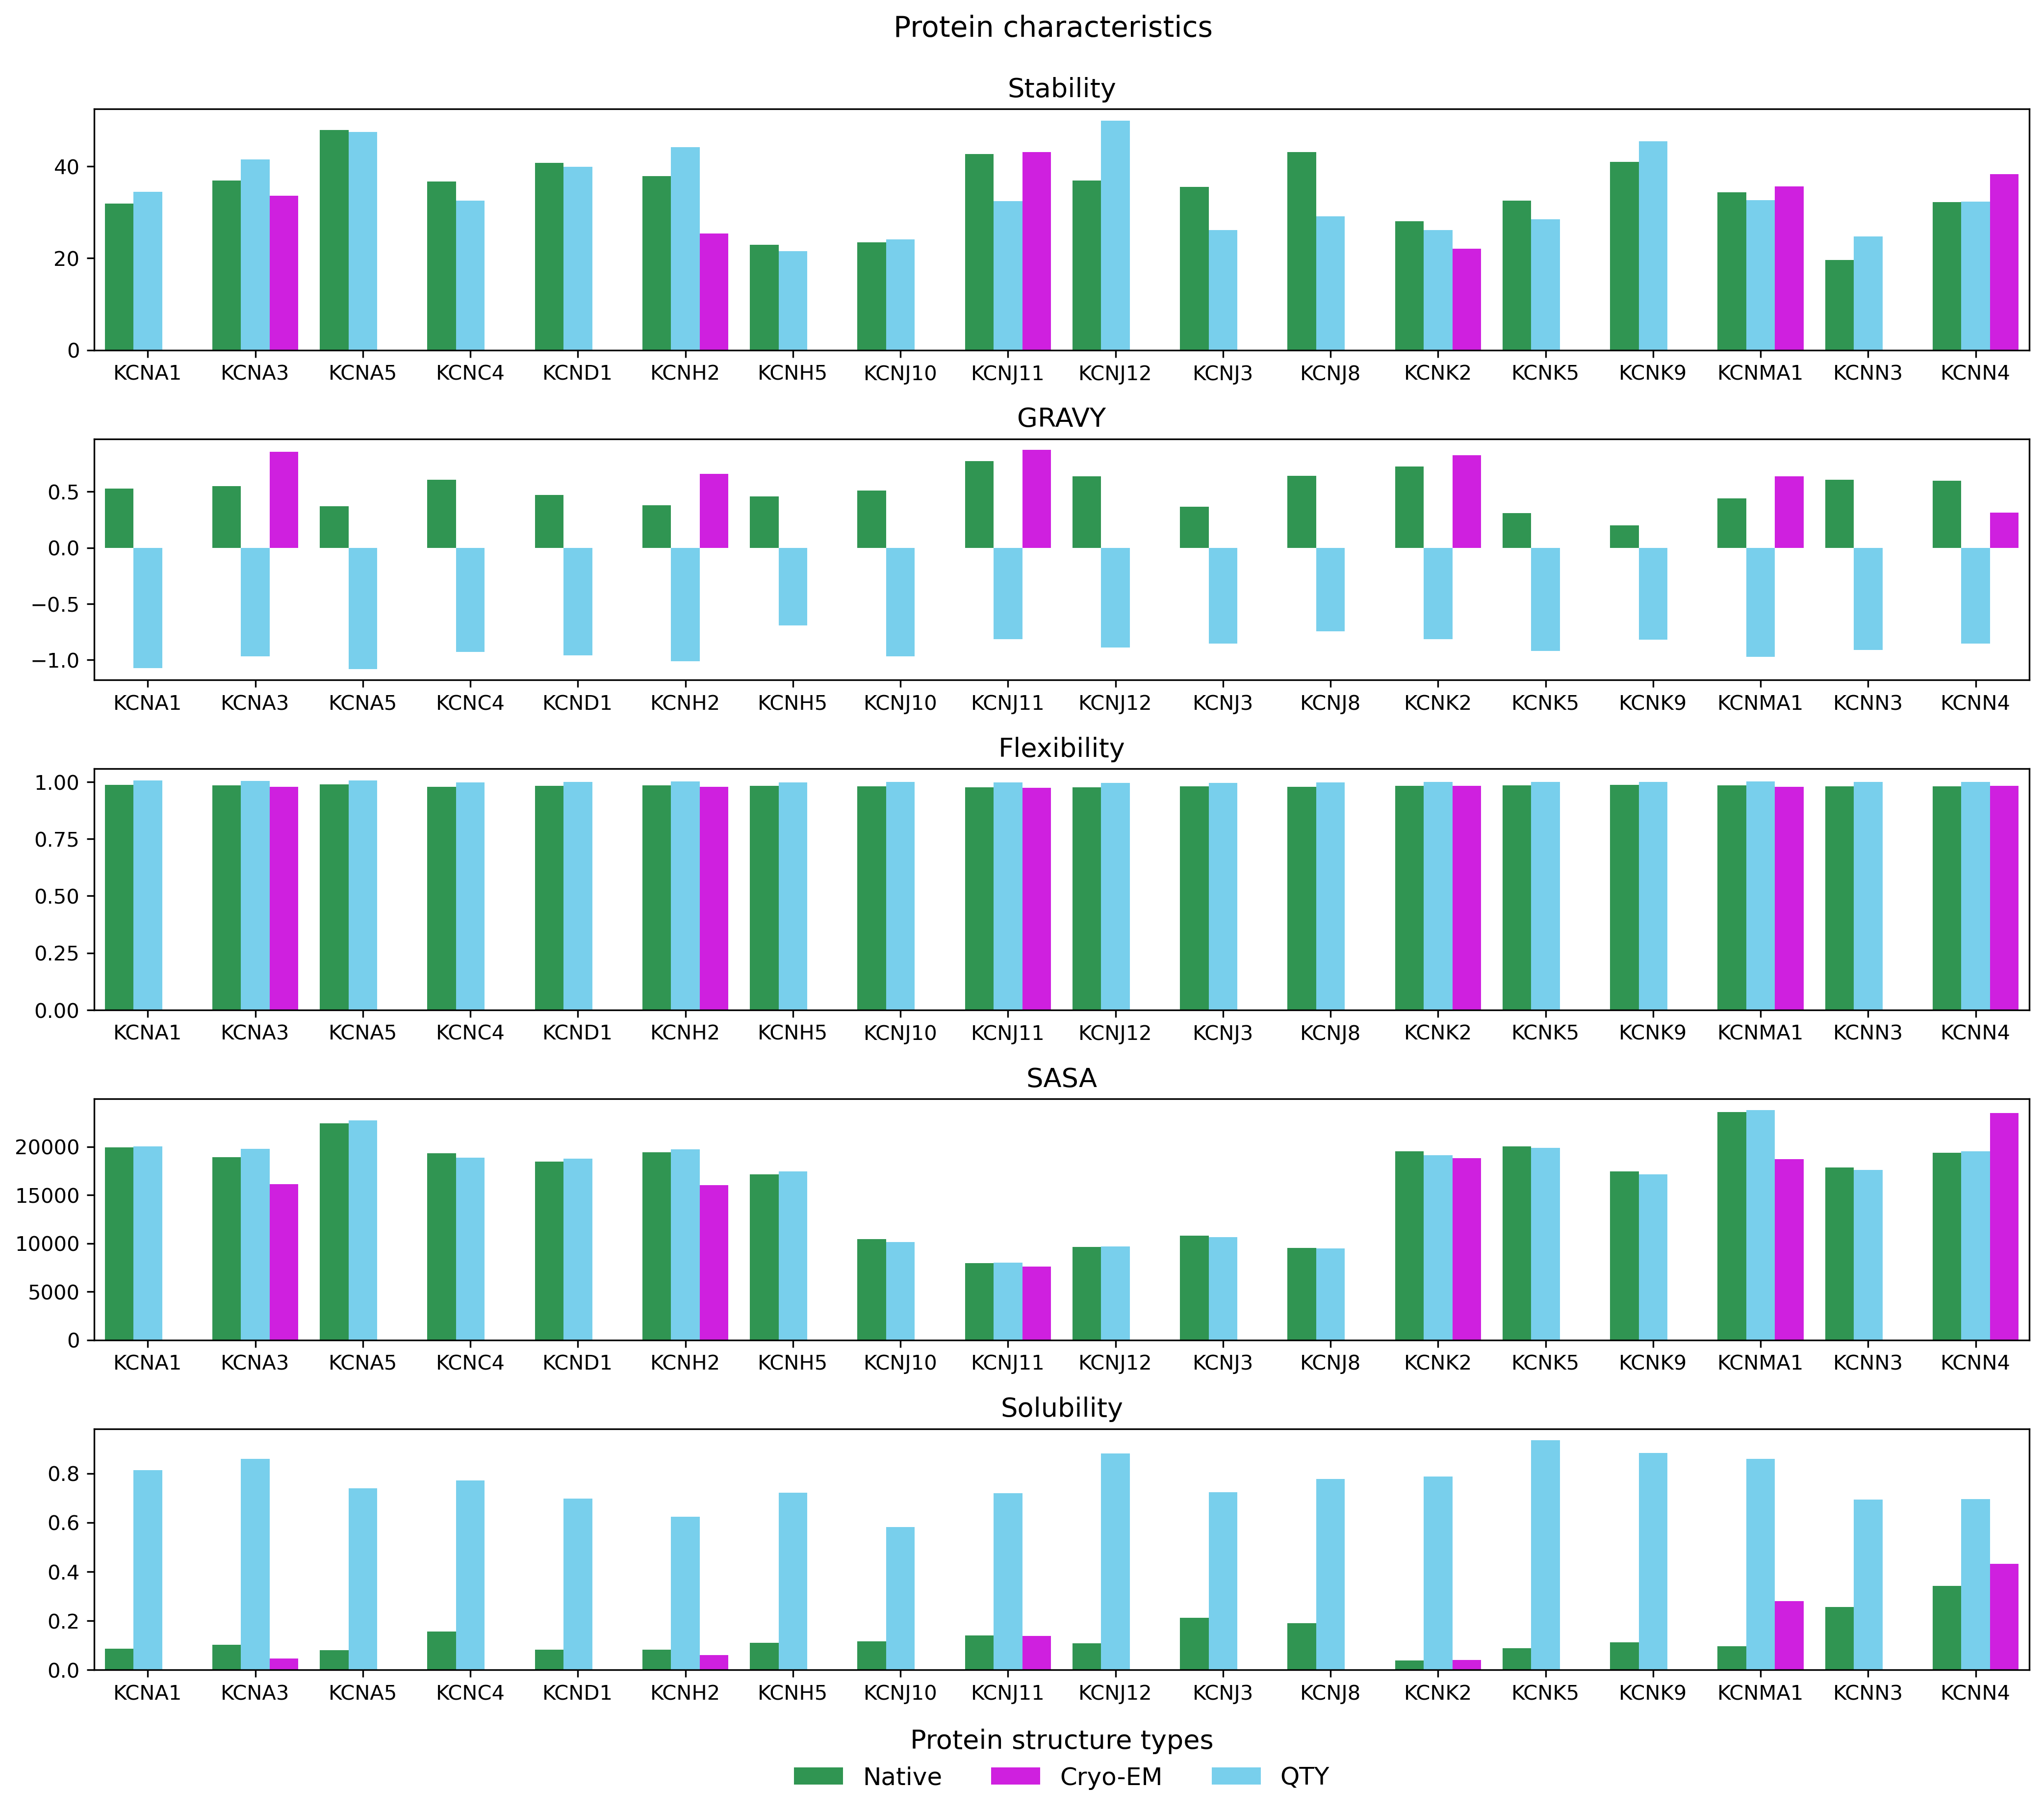

In [10]:
fig, axs = plt.subplots(nrows = 5, ncols = 1, figsize = (14, 12), dpi = 300)
axs = axs.flatten()

#colors = ['#65D9FF', '#EA00FF', '#1FA64D'] #  Native, Cryo-EM, QTY
#colors = ['#EA00FF', '#65D9FF', '#1FA64D'] #  Native, Cryo-EM, QTY
colors = ['#1FA64D', '#65D9FF', '#EA00FF'] #  Native, Cryo-EM, QTY
sns.set_palette(sns.color_palette(colors))

parameters = ['Stability', 'GRAVY', 'Flexibility', 'SASA', 'Solubility']

for n, column in enumerate(parameters):
    sns.barplot(data = df, x = 'name', y = column, hue = 'type', ax = axs[n])
    axs[n].set_ylabel('')
    axs[n].set_xlabel('')
    axs[n].get_legend().remove()
    axs[n].set_title(f'{column}', fontsize = 13)
  
handles, labels = plt.gca().get_legend_handles_labels()
legend_order = [0, 2, 1]
legend = axs[n].legend([handles[idx] for idx in legend_order],[labels[idx] for idx in legend_order],  
                       loc = 'upper center', bbox_to_anchor = (0.5, -0.15), frameon = False, 
                       fancybox = False, shadow = False, ncol = 3, fontsize = 12)
legend.set_title('Protein structure types', prop = {'size': 13})
    
#fig.text(0.5, -0.01, 'Proteins', ha='center', fontsize = 12)
#fig.text(-0.01, 0.5, 'Characteristics', va='center', rotation='vertical', fontsize = 12)
fig.text(0.515, 1.01, 'Protein characteristics', ha='center', fontsize = 14)
    
plt.tight_layout(pad = 1.1)
#plt.show()
plt.savefig(path + 'kcn_params.png')